In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings
import unittest
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import csv
import requests
import numpy as np
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore") # for hi square

# Web Crawling & Using Selenium(Obtaining data)

In [116]:
def put_value(label, list_info):
        try:
            index = list_info.index(label, 0, len(list_info))
        except:
             return None
        return list_info[index-1]

In [264]:
url = "https://earthquake.usgs.gov/earthquakes/map/?extent=-88.47556,-247.5&extent=88.47556,607.5&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-12-17%2000:00:00%22,%22endtime%22:%222022-12-24%2023:59:59%22,%22minmagnitude%22:0,%22minsig%22:0,%22minmmi%22:0,%22mincdi%22:0,%22minfelt%22:0,%22orderby%22:%22time%22%7D%7D"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)  # open of the page
time.sleep(10)


Magnitude=[]
Time=[]
Location=[]
Depth=[]
DYFI=[]
ShakeMap=[]
PAGER=[]
Tsunami = []
jump = 798182
Longitude= []
Latitude=[] 
max_iteration = 525

for load_page in range(max_iteration):
    
    for j in range(1,75):
        driver.execute_script(
        f"document.querySelector('cdk-virtual-scroll-viewport').scrollTop={jump}")
        time.sleep(1)
        print(j)
        try:
            
            element = driver.find_element(
            By.XPATH, f"/html/body/usgs-root/div/usgs-list/cdk-virtual-scroll-viewport/div[1]/usgs-events-list/mat-list/mat-list-item[{j}]/div/usgs-event-item/usgs-event-item-detail")
            element.click()
            
            
        except:
            continue
        time.sleep(1)
        more_info = driver.find_element(
        By.XPATH, "/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-content/div[2]")
        location_info = driver.find_element(
            By.XPATH, "/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-content/dl/dd[2]")
        try:

            list_more_info = more_info.text.split("\n")
            list_info = element.text.split("\n")
            list_location = location_info.text.split(" ")
            
        except:
            close = driver.find_element(
            By.XPATH, "/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-actions/button/span[1]")
            close.click()
            continue
        if len(list_info)<4 or len(list_location)<2:
            close = driver.find_element(
            By.XPATH, "/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-actions/button/span[1]")
            time.sleep(1)
            close.click()
            continue
        
        Magnitude.append(list_info[0])
        Location.append(list_info[1])
        Time.append(list_info[2])
        Depth.append(list_info[3])
        Longitude.append(list_location[0])
        Latitude.append(list_location[1])

        DYFI.append(put_value(list_info = list_more_info,label = "DYFI"))
        ShakeMap.append(put_value(list_info = list_more_info, label = "ShakeMap"))
        PAGER.append(put_value(list_info = list_more_info, label = "PAGER"))
        
        try:
            tsunami = driver.find_element(By.XPATH,"/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-content/div[2]/a[4]/usgs-bubble/div/usgs-tsunami-bubble/span")
            
            Tsunami.append(1)
        except:
            Tsunami.append(0)
        close = driver.find_element(
            By.XPATH, "/html/body/usgs-root/div/usgs-details-info-box/mat-card/mat-card-actions/button/span[1]")
        close.click()
    jump += 1562   

driver.quit()

# Source - https://selenium-python.readthedocs.io/
# Source - https://www.selenium.dev/documentation/webdriver/
# Source - https://earthquake.usgs.gov/
# Source - https://earthquake.usgs.gov/earthquakes/map/?extent=-88.47556,-247.5&extent=88.47556,607.5&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-12-17%2000:00:00%22,%22endtime%22:%222022-12-24%2023:59:59%22,%22minmagnitude%22:0,%22minsig%22:0,%22minmmi%22:0,%22mincdi%22:0,%22minfelt%

C:\Users\Tal\AppData\Local\Temp\ipykernel_13048\2348837367.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
5

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x0041F243]
	(No symbol) [0x003A7FD1]
	(No symbol) [0x0029D04D]
	(No symbol) [0x00282D7A]
	(No symbol) [0x002EBE7B]
	(No symbol) [0x002FC196]
	(No symbol) [0x002E8386]
	(No symbol) [0x002C163C]
	(No symbol) [0x002C269D]
	GetHandleVerifier [0x006B9A22+2655074]
	GetHandleVerifier [0x006ACA24+2601828]
	GetHandleVerifier [0x004C8C0A+619850]
	GetHandleVerifier [0x004C7830+614768]
	(No symbol) [0x003B05FC]
	(No symbol) [0x003B5968]
	(No symbol) [0x003B5A55]
	(No symbol) [0x003C051B]
	BaseThreadInitThunk [0x76E900F9+25]
	RtlGetAppContainerNamedObjectPath [0x77DF7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77DF7B8E+238]


# Making DataFrame

In [265]:
pf22 = pd.DataFrame({
    "Magnitude": Magnitude,
    "Location": Location,
    "Time": Time,
    "Depth": Depth,
    "DYFI": DYFI,
    "ShakeMap": ShakeMap,
    "PAGER": PAGER,
    "Tsunami": Tsunami,
    "Longitude": Longitude,
    "Latitude": Latitude


})

## Dropping duplicates for each DataFrame

In [266]:
pf22.drop_duplicates(inplace=True)

In [271]:
Dataframe = [pf, pf2, pf3, pf4, pf5, pf6, pf7, pf8, pf9,
 pf10, pf11, pf12, pf13, pf14, pf15, 
 pf16, pf17, pf18, pf19, pf20,
  pf21,pf22] 

#every 100 minutes the website crashed 
result = pd.concat(Dataframe)

In [273]:
result.drop_duplicates(inplace=True)

## Loading the dataframe after the crawling 

In [69]:
result = pd.read_csv("C:/tmp/new project/datanew.csv")

In [3]:
result

,Unnamed: 0,Magnitude,Location,Time,Depth,DYFI,ShakeMap,PAGER,Tsunami,Longitude,Latitude
0,0,3.8,"4 km SW of Fuig, Puerto Rico",2022-12-24 11:51:57 (UTC),7.0 km,V,III,NaN,0,17.965°N,66.948°W
1,1,3.7,"4 km WSW of Guánica, Puerto Rico",2022-12-24 04:27:28 (UTC),8.0 km,V,III,NaN,0,17.957°N,66.947°W
2,2,3.7,NaN,2022-12-22 17:57:33 (UTC),78.0 km,III,II,NaN,0,63.249°N,148.390°W
3,3,5.5,NaN,2022-12-22 13:13:55 (UTC),157.0 km,V,IV,GREEN,0,8.042°S,74.503°W
4,4,3.8,"6km NW of Petrolia, CA",2022-12-22 11:49:55 (UTC),28.7 km,III,III,NaN,0,40.360°N,124.335°W
...,...,...,...,...,...,...,...,...,...,...,...
11581,998,6.7,"3 km ESE of Browns Point, Washington",1965-04-29 15:28:45 (UTC),64.7 km,VIII,VII,NaN,0,47.288°N,122.406°W
11582,999,9.2,"1964 Prince William Sound Earthquake, Alaska",1964-03-28 03:36:16 (UTC),25.0 km,IX,VIII,NaN,0,60.908°N,147.339°W
11583,1000,7.5,"6km WNW of Grapevine, CA",1952-07-21 11:52:14 (UTC),6.0 km,IX,IX,NaN,0,34.958°N,118.998°W
11584,1001,6.7,"4 km WNW of Roy, Washington",1949-04-13 19:55:43 (UTC),50.0 km,VIII,VII,NaN,0,47.014°N,122.597°W


# Cleaning and Formatting the data 

In [4]:
result['Tsunami'] = result['Tsunami'].astype('category')
result['PAGER'] = result['PAGER'].astype('category')

result['ShakeMap'] = result['ShakeMap'].astype('category')
result['DYFI'] = result['DYFI'].astype('category')

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  11586 non-null  int64   
 1   Magnitude   11586 non-null  float64 
 2   Location    11558 non-null  object  
 3   Time        11586 non-null  object  
 4   Depth       11586 non-null  object  
 5   DYFI        11537 non-null  category
 6   ShakeMap    11316 non-null  category
 7   PAGER       4990 non-null   category
 8   Tsunami     11586 non-null  category
 9   Longitude   11586 non-null  object  
 10  Latitude    11586 non-null  object  
dtypes: category(4), float64(1), int64(1), object(5)
memory usage: 680.0+ KB


In [298]:
result.ShakeMap.unique()

['III', 'II', 'IV', 'I', 'V', 'VIII', 'VI', NaN, 'VII', 'IX']
Categories (9, object): ['I', 'II', 'III', 'IV', ..., 'V', 'VI', 'VII', 'VIII']

In [6]:
replace_ = {'GREEN': 1, 'YELLOW': 2, 'ORANGE': 3, 'RED': 4}
data = result.replace(replace_)

In [7]:
replace_Roma_numbers = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6, 'VII': 7, 'VIII':8,"IX":9,"X":10}
data.replace(replace_Roma_numbers, inplace=True)

In [8]:
data["Depth"] = data['Depth'].str.replace('km','').astype(float)

In [9]:
data["Magnitude"] = data['Magnitude'].astype(float)

In [17]:
data

,Unnamed: 0,Magnitude,Location,Time,Depth,DYFI,ShakeMap,PAGER,Tsunami,Longitude,Latitude
0,0,3.8,"4 km SW of Fuig, Puerto Rico",2022-12-24 11:51:57 (UTC),7.0,5,3,NaN,0,17.965°N,66.948°W
1,1,3.7,"4 km WSW of Guánica, Puerto Rico",2022-12-24 04:27:28 (UTC),8.0,5,3,NaN,0,17.957°N,66.947°W
2,2,3.7,NaN,2022-12-22 17:57:33 (UTC),78.0,3,2,NaN,0,63.249°N,148.390°W
3,3,5.5,NaN,2022-12-22 13:13:55 (UTC),157.0,5,4,1,0,8.042°S,74.503°W
4,4,3.8,"6km NW of Petrolia, CA",2022-12-22 11:49:55 (UTC),28.7,3,3,NaN,0,40.360°N,124.335°W
...,...,...,...,...,...,...,...,...,...,...,...
11581,998,6.7,"3 km ESE of Browns Point, Washington",1965-04-29 15:28:45 (UTC),64.7,8,7,NaN,0,47.288°N,122.406°W
11582,999,9.2,"1964 Prince William Sound Earthquake, Alaska",1964-03-28 03:36:16 (UTC),25.0,9,8,NaN,0,60.908°N,147.339°W
11583,1000,7.5,"6km WNW of Grapevine, CA",1952-07-21 11:52:14 (UTC),6.0,9,9,NaN,0,34.958°N,118.998°W
11584,1001,6.7,"4 km WNW of Roy, Washington",1949-04-13 19:55:43 (UTC),50.0,8,7,NaN,0,47.014°N,122.597°W


### Converting GPS coordinates into Latitude and Longitude 

In [10]:
# Get the element as a tuple from the two columns
tuple_element = data[['Longitude', 'Latitude']].apply(lambda x: tuple(x), axis = 1)

# Coordinates in the format "latitude N/S, longitude E/W"
ser_latitude = []
ser_longitude = []
for cordinate in tuple_element:

    latitude, longitude = cordinate

    # Extract the hemisphere indicators from the latitude and longitude values
    list_latitude = latitude.split("°")
    list_longitude = longitude.split("°")
    latitude_hemisphere = list_latitude[1]
    longitude_hemisphere = list_longitude[1]

    # Remove the hemisphere indicators from the latitude and longitude values
    latitude = float(list_latitude[0])
    longitude = float(list_longitude[0])

    # Convert the latitude and longitude values to decimal degrees
    if latitude_hemisphere == 'N':
        latitude_decimal = latitude
    else:
        latitude_decimal = -latitude

    if longitude_hemisphere == 'E':
        longitude_decimal = longitude
    else:
        longitude_decimal = -longitude

    # Print the decimal degree values
    ser_latitude.append(latitude_decimal)
    ser_longitude.append(longitude_decimal)
data["Longitude"] = ser_longitude
data["Latitude"] = ser_latitude
df = data.copy()

In [11]:
import datetime

Date = []
Time = []
for element in df["Time"]:
    dt = datetime.datetime.strptime(
        element, "%Y-%m-%d %H:%M:%S (%Z)")  # 2022-12-24 11:51:57 (UTC)
    date = dt.date()
    time = dt.time()
    date = dt.strftime("%d/%m/%Y")
    time = dt.strftime("%H:%M:%S")
    Date.append(date)
    Time.append(time)

In [12]:
df.drop("Time",inplace = True,axis = 1)
df["Time"] = Time
df["Date"] = Date

In [602]:
df

,Magnitude,Location,Depth,DYFI,ShakeMap,PAGER,Tsunami,Longitude,Latitude,Time,Date
0,3.8,"4 km SW of Fuig, Puerto Rico",7.0,5,3,NaN,0,-66.948,17.965,11:51:57,24/12/2022
1,3.7,"4 km WSW of Guánica, Puerto Rico",8.0,5,3,NaN,0,-66.947,17.957,04:27:28,24/12/2022
2,3.7,null,78.0,3,2,NaN,0,-148.390,63.249,17:57:33,22/12/2022
3,5.5,null,157.0,5,4,1,0,-74.503,-8.042,13:13:55,22/12/2022
4,3.8,"6km NW of Petrolia, CA",28.7,3,3,NaN,0,-124.335,40.360,11:49:55,22/12/2022
...,...,...,...,...,...,...,...,...,...,...,...
998,6.7,"3 km ESE of Browns Point, Washington",64.7,8,7,NaN,0,-122.406,47.288,15:28:45,29/04/1965
999,9.2,"1964 Prince William Sound Earthquake, Alaska",25.0,9,8,NaN,0,-147.339,60.908,03:36:16,28/03/1964
1000,7.5,"6km WNW of Grapevine, CA",6.0,9,9,NaN,0,-118.998,34.958,11:52:14,21/07/1952
1001,6.7,"4 km WNW of Roy, Washington",50.0,8,7,NaN,0,-122.597,47.014,19:55:43,13/04/1949


## Using API (Geographic Coordinate System)  to fill NaN locations

In [491]:
tuple_element = df[['Longitude', 'Latitude']].apply(lambda x: tuple(x), axis=1)
states = []
for cordinate in tuple_element:
    url = f'https://nominatim.openstreetmap.org/reverse?lat={cordinate[1]}&lon={cordinate[0]}&format=json'
    time.sleep(1)
    response = requests.get(url)
    
# Check the response status code to make sure the request was successful
    if response.status_code == 200:
    # Parse the JSON response
        res = response.json()
        try:
            states.append(res["display_name"])


        except:
            states.append("Sea")

states

# Api Source from -  https://www.geodatasource.com/developers/python


['145, Calle La Montalva, Magueyes, Montalva, Guánica, Puerto Rico, 00647, United States',
 'Los Pitufos, Magueyes, Montalva, Guánica, Puerto Rico, 00647, United States',
 'Matanuska-Susitna, Alaska, United States',
 'Callería, Coronel Portillo, Ucayali, Perú',
 'Humboldt County, California, 95536, United States',
 'Humboldt County, California, United States',
 'Custer County, Idaho, United States',
 'Humboldt County, California, United States',
 'Nahuluhulu Point, Hawaiʻi County, Hawaii, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Bear River Ridge Road, Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States',
 'Humboldt County, California, United States

# Translate the results to English

In [ ]:
from deep_translator import GoogleTranslator
list_translated = []
for stat in states:
    list_translated.append(GoogleTranslator(source = 'auto', target ='en').translate(stat))
list_translated


# Google Translator Package - https://pypi.org/project/deep-translator/
# Source - https://www.thepythoncode.com/article/translate-text-in-python


In [15]:
pd.to_csv("C:/tmp/new project/datAfterCleaning3.csv")

,Unnamed: 0,Magnitude,Location,Depth,DYFI,ShakeMap,PAGER,Tsunami,Longitude,Latitude,Time,Date,RingOfFire,IsSea
0,0,3.8,"145, Calle La Montalva, Magueyes, Montalva, Gu...",7.0,5.0,3.0,NaN,0,-66.948,17.965,11:51:57,24/12/2022,1,0
1,1,3.7,"The Smurfs, Magueyes, Montalva, Guánica, Puert...",8.0,5.0,3.0,NaN,0,-66.947,17.957,04:27:28,24/12/2022,1,0
2,2,3.7,"Matanuska-Susitna, Alaska, United States",78.0,3.0,2.0,NaN,0,-148.390,63.249,17:57:33,22/12/2022,1,0
3,3,5.5,"Street, Coronel Portillo, Ucayali, Peru",157.0,5.0,4.0,1.0,0,-74.503,-8.042,13:13:55,22/12/2022,1,0
4,4,3.8,"Humboldt County, California, 95536, United States",28.7,3.0,3.0,NaN,0,-124.335,40.360,11:49:55,22/12/2022,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,11581,6.7,"Marine View Drive, North East, Tacoma, Pierce ...",64.7,8.0,7.0,NaN,0,-122.406,47.288,15:28:45,29/04/1965,0,0
11582,11582,9.2,"Chugach, Alaska, United States",25.0,9.0,8.0,NaN,0,-147.339,60.908,03:36:16,28/03/1964,1,0
11583,11583,7.5,"CAL Fire Kern County, California, United States",6.0,9.0,9.0,NaN,0,-118.998,34.958,11:52:14,21/07/1952,1,0
11584,11584,6.7,"Pierce County, Washington, United States",50.0,8.0,7.0,NaN,0,-122.597,47.014,19:55:43,13/04/1949,0,0


## Loading the Dataframe after The api

In [70]:
df = pd.read_csv("C:/tmp/new project/datAfterCleaning3.csv")
#after downloading from the api

### Most of the states which located in the Ring Of Fire zone:

In [4]:

list_ring_of_fire_states = [
"Japan",
"Philippines",
"Indonesia",
"New Zealand",
"Papua New Guinea",
"Solomon Islands",
"Vanuatu",
'Fiji',
"Tonga",
"Samoa",
"Kiribati",
"Marshall Islands",
"Federated States of Micronesia",
"Nauru",
"Palau",
"Guam",
"Northern Mariana Islands",
"Alaska", "Hawaii", "California",
"British Columbia", "Yukon,"" Alberta",
"Baja California", 'Oaxaca',
'Chile',
"Peru",
"Ecuador",
"Colombia",
"Panama",
'Costa Rica',
'Nicaragua',
"Honduras",
"El Salvador",
"Guatemala",
"Belize",
"Cuba",
"Jamaica",
"Dominican Republic",
"Haiti",
"Puerto Rico"
]


# list of states in the ring of fire - https://en.wikipedia.org/wiki/Ring_of_Fire

## Adding the RingOfFire coulmn - which is boolean value 0 or 1

In [5]:
InsideTheRingOfFire = []
for i, state in enumerate(df["Location"]):
    index = -1
    for element in list_ring_of_fire_states:
        if state.find(element) != -1 or list_translated[i].find(element) != -1:
            index = 1
            break
    if index == 1:
        InsideTheRingOfFire.append(1)
    else:
        InsideTheRingOfFire.append(0)

df["RingOfFire"] = InsideTheRingOfFire

NameError: name 'list_translated' is not defined

## we add the IsSea coulmn

In [6]:
IsSea = []
for place in df["Location"]:
    if place == 'Sea':
        IsSea.append(1)
    else:
        IsSea.append(0)

df["IsSea"] = IsSea
df["IsSea"] = df['IsSea'].astype('category')

### Creating the source coulmn (the location from the website)

In [71]:
df["Source"] = result["Location"]
#df["Location"] = list_translated

df["RingOfFire"] = df['RingOfFire'].astype('category')


###  Splitting the KM from source to additional coulmn

In [72]:
dist_from_source = []

for element in df["Source"]:
    try:
        dist_from_source.append(int(element.split("km")[0].strip()))
    except:
        dist_from_source.append(None)
df["dis_from_source"] = dist_from_source

### Dropping the column "PAGER" due to more than 50% missing values and the rows that have missing values in "DYFI" and "ShakeMap" columns


In [73]:
df3 = df.drop("PAGER",axis = 1)
df3 = df3.dropna(subset = ["DYFI", "ShakeMap"], axis = 0)

## Creating the "state" column

In [74]:
country = []

for element in df3["Location"]:
    country_name = element.split(",")[-1].strip()
    country.append(country_name)

df3["State"] = country

In [75]:
df3["IsSea"] = df3['IsSea'].astype("category")
df3["RingOfFire"] = df3["RingOfFire"].astype("category")
df3["Tsunami"] = df3['Tsunami'].astype("category")

df3["DYFI"] = df3['DYFI'].astype("category")
df3['Date'] = pd.to_datetime(df3['Date'])

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11274 entries, 0 to 11585
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       11274 non-null  int64         
 1   Magnitude        11274 non-null  float64       
 2   Location         11274 non-null  object        
 3   Depth            11274 non-null  float64       
 4   DYFI             11274 non-null  category      
 5   ShakeMap         11274 non-null  float64       
 6   Tsunami          11274 non-null  category      
 7   Longitude        11274 non-null  float64       
 8   Latitude         11274 non-null  float64       
 9   Time             11274 non-null  object        
 10  Date             11274 non-null  datetime64[ns]
 11  RingOfFire       11274 non-null  category      
 12  IsSea            11274 non-null  category      
 13  Source           11250 non-null  object        
 14  dis_from_source  10718 non-null  float

# Outliers

## Magnitude

Int64Index([], dtype='int64')


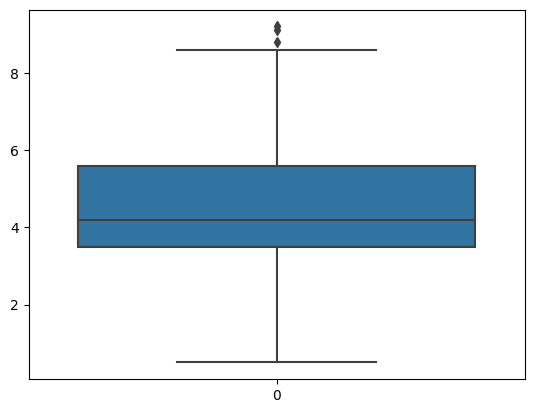

In [33]:
import seaborn as sns
import pandas as pd


# Use seaborn to create a boxplot of the data
sns.boxplot(df.Magnitude)

# Compute the 25th and 75th percentiles
q25 = df3["Magnitude"].quantile(0.25)
q75 = df3["Magnitude"].quantile(0.75)

# Calculate the IQR
iqr = q75 - q25

# Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
outliers = df3[(df3["Magnitude"] < q25 - 3*iqr)
              | (df3["Magnitude"] > q75 + 3*iqr)]

# Print the indices of the outliers
print(outliers.index)

## Depth

,Unnamed: 0,Magnitude,Location,Depth,DYFI,ShakeMap,Tsunami,Longitude,Latitude,Time,Date,RingOfFire,IsSea,Source,dis_from_source,State
3,3,5.5,"Street, Coronel Portillo, Ucayali, Peru",157.0,5.0,4.0,0,-74.503,-8.042,13:13:55,2022-12-22,1,0,NaN,NaN,Peru
22,22,3.9,"Kenai Peninsula, Alaska, United States",120.8,3.0,3.0,0,-153.293,59.842,05:38:24,2022-12-18,1,0,"46 km E of Pedro Bay, Alaska",46.0,United States
41,41,5.6,"San Pedro de Atacama, El Loa Province, Antofag...",114.2,4.0,4.0,0,-68.130,-23.114,06:41:28,2022-10-12,1,0,"23 km SSE of San Pedro de Atacama, Chile",23.0,Chile
48,48,5.8,"Cikancana, Cianjur, West Java, Indonesia",107.0,6.0,4.0,0,107.141,-6.713,00:50:55,2022-08-12,1,0,"17 km NW of Ciranjang-hilir, Indonesia",17.0,Indonesia
59,59,5.4,Sea,146.8,3.0,4.0,0,-174.210,-15.234,14:21:26,2022-05-12,1,1,"91 km NNW of Hihifo, Tonga",91.0,Sea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,11318,6.1,"Momostenango, Totonicapán, Guatemala",197.4,9.0,4.0,0,-91.381,15.144,13:37:37,2005-03-17,1,0,"10 km NE of San Bartolo, Guatemala",10.0,Guatemala
11331,11331,5.7,"Murgob District, Badakhshan Mountainous Autono...",114.9,2.0,4.0,0,72.707,38.107,23:04:04,2005-02-25,0,0,"110 km W of Murghob, Tajikistan",110.0,Tajikistan
11341,11341,7.1,Sea,525.0,7.0,3.0,0,123.337,5.293,12:23:18,2005-05-02,1,1,"138 km SW of Palimbang, Philippines",138.0,Sea
11389,11389,6.5,"Calatagan, Batangas, Calabarzon, 4215, Philipp...",105.0,5.0,5.0,0,120.534,13.925,14:36:06,2004-08-10,1,0,"9 km W of Talisay, Philippines",9.0,Philippines


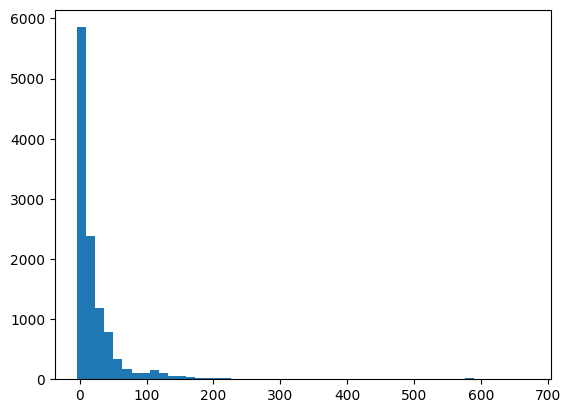

In [34]:
import seaborn as sns
import pandas as pd


# Use seaborn to create a boxplot of the data

plt.hist(df.Depth, bins=50)
# Compute the 25th and 75th percentiles
q25 = df3["Depth"].quantile(0.25)
q75 = df3["Depth"].quantile(0.75)

# Calculate the IQR
iqr = q75 - q25

# Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
outliers = df3[(df3["Depth"] < q25 - 3*iqr)
             |(df3["Depth"] > q75 + 3*iqr)]

# Print the indices of the outliers
outliers

## Searching for the first year that had tsunami

In [76]:
df3.sort_values(by='Date', ascending = True, inplace = True)
df3.reset_index(inplace = True)
for i,element in enumerate(df3["Tsunami"]):
    if element == 1:
        print(i)
        break

df3 = df3.iloc[1728:]

1728


# EDA

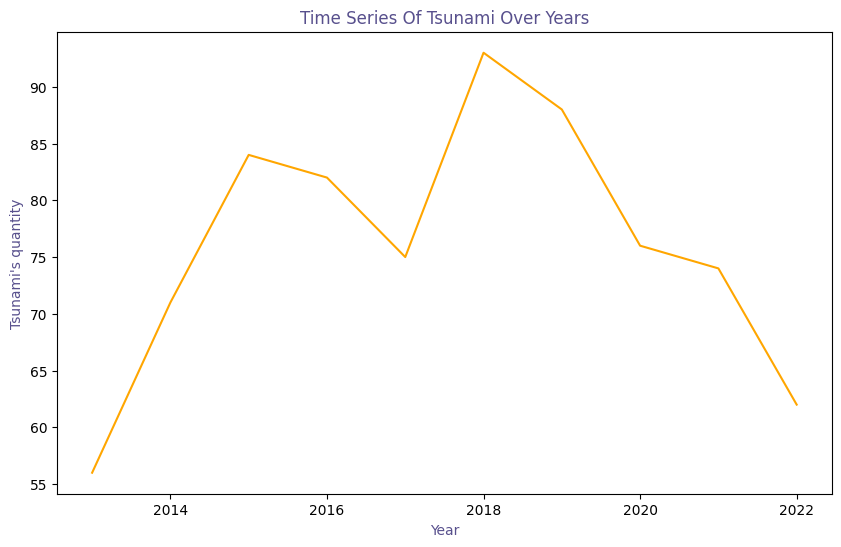

In [77]:
grouped = df3.groupby(df3['Date'].dt.year)
df3["Tsunami"] = df3["Tsunami"].astype("int")
Tsunami_f_year = {year: grouped.get_group(
    year)['Tsunami'].sum() for year in df3['Date'].dt.year.unique()}

plt.figure(figsize = (10, 6))
Time_series = sns.lineplot(
    x = Tsunami_f_year.keys(), y = Tsunami_f_year.values(), color = "#ffa600")

Time_series.set_title("Time Series Of Tsunami Over Years", color = "#58508d")
Time_series.set_ylabel("Tsunami's quantity", color = "#58508d")
Time_series.set_xlabel("Year", color = "#58508d")
df3["Tsunami"] = df3["Tsunami"].astype("category")

# Source - https://seaborn.pydata.org/generated/seaborn.lineplot.html

Text(0.5, 0, 'Distance from source')

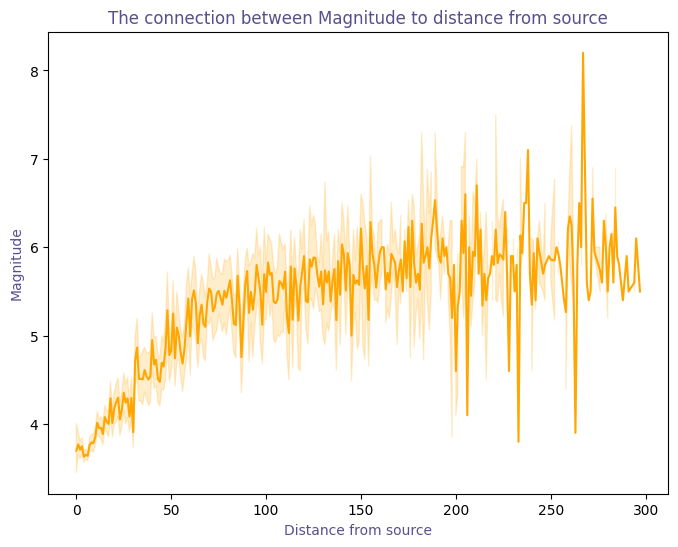

In [38]:
plt.figure(figsize = (8, 6))
Time_series = sns.lineplot(
    x = "dis_from_source", y = "Magnitude", data = df3, color = "#ffa600")

Time_series.set_title(
    "The connection between Magnitude to distance from source", color = "#58508d")

Time_series.set_ylabel("Magnitude", color = "#58508d")
Time_series.set_xlabel("Distance from source", color = "#58508d")

Text(0.5, 0, 'month')

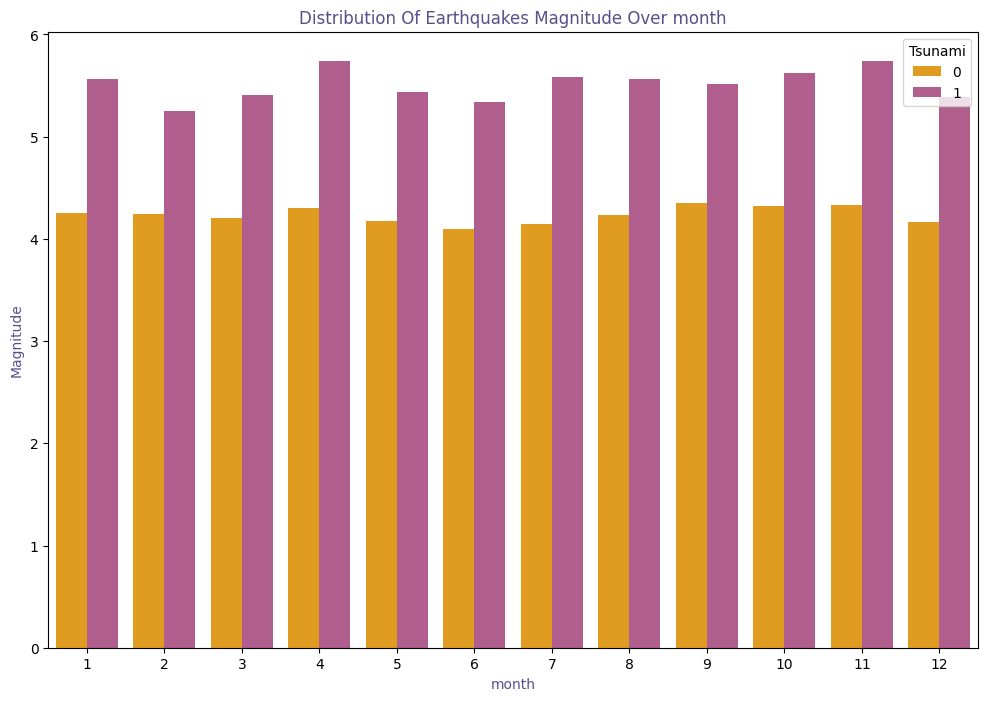

In [168]:
colours = ["#ffa600", "#bc5090", "#ff6361", "#003f5c"]
plt.figure(figsize = (12, 8))

Days_of_week = sns.barplot(
    x = df3['Date'].dt.month, y = "Magnitude", data = df3, ci = None, hue = "Tsunami", palette = colours)
Days_of_week.set_title(
    "Distribution Of Earthquakes Magnitude Over Month", color = "#58508d")

Days_of_week.set_ylabel("Magnitude", color = "#58508d")
Days_of_week.set_xlabel("Month", color = "#58508d")

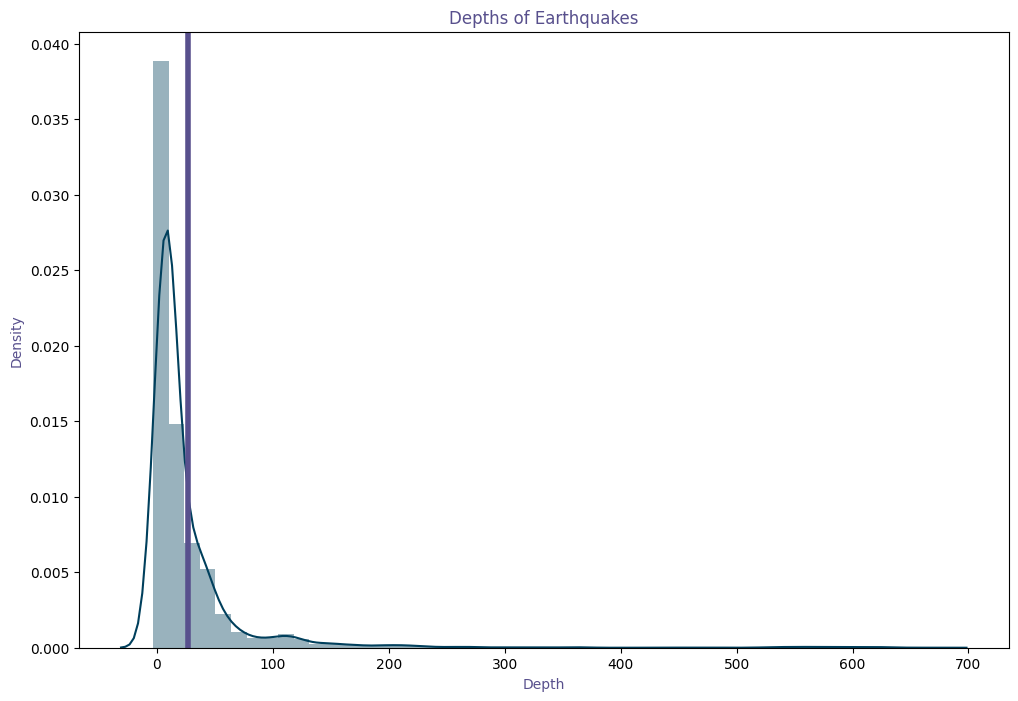

In [169]:
plt.figure(figsize = (12,8))
depth = df3["Depth"].values
mean_D = df3["Depth"].mean()

Depth_plot = sns.distplot(depth, color = "#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color = "#58508d")
Depth_plot.set_ylabel("Density", color = "#58508d")

Depth_plot.set_xlabel("Depth", color = "#58508d")
plt.axvline(mean_D,0,1, color = "#58508d",linewidth = 4,label = "Mean")


# Source - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html

In [39]:
fig = px.scatter_geo(
    df3,  
    lat = "Latitude",
    lon = "Longitude",
    color_continuous_scale = px.colors.sequential.Bluered,
    opacity = 0.5,
    projection = "equirectangular",
    color = "Magnitude",
    hover_data = ["Magnitude", "Tsunami"],
    title = f"Earthquakes 2013-2022"
)
fig.show()


# Source - https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html

In [40]:
fig = px.scatter(data_frame = df3, x = "Depth", y = "Magnitude", color = "Tsunami", hover_data = [
                 "Tsunami"], opacity = 0.5, title = "Depth vs Magnitude vs Tsunami")
fig.show()

# Source - https://plotly.com/python/line-and-scatter/#scatter-plots-and-categorical-axes

In [41]:
ct1 = pd.crosstab(df3['Depth'], df3['Tsunami'])
ct1.corr()

Tsunami,0,1
Tsunami,,
0,1.000000,0.837342
1,0.837342,1.000000


In [42]:
ct1 = pd.crosstab(df3['Magnitude'], df3['Tsunami'])
ct1.corr()


Tsunami,0,1
Tsunami,,
0,1.000000,-0.050467
1,-0.050467,1.000000


In [43]:
fig = px.scatter(data_frame = df3, x = "dis_from_source", y = "Magnitude", color = "Tsunami", hover_data = [
                 "Tsunami"], opacity = 0.7, title = "Distance from source vs Tsunami")
fig.show()


In [44]:
# Converting "Tsunami" column to int temporary
df3["Tsunami"] = df3["Tsunami"].astype("int")

In [46]:
fig = px.scatter_mapbox(df3, lat = "Latitude", lon="Longitude", color="Tsunami",
                         size_max=15, zoom = 1,height = 700,
                        mapbox_style="carto-positron", title="Tsunami vs Magnitude vs cordinate")
fig.show()

# Source - https://plotly.com/python/scattermapbox/

<AxesSubplot: title={'center': 'Heatmap'}>

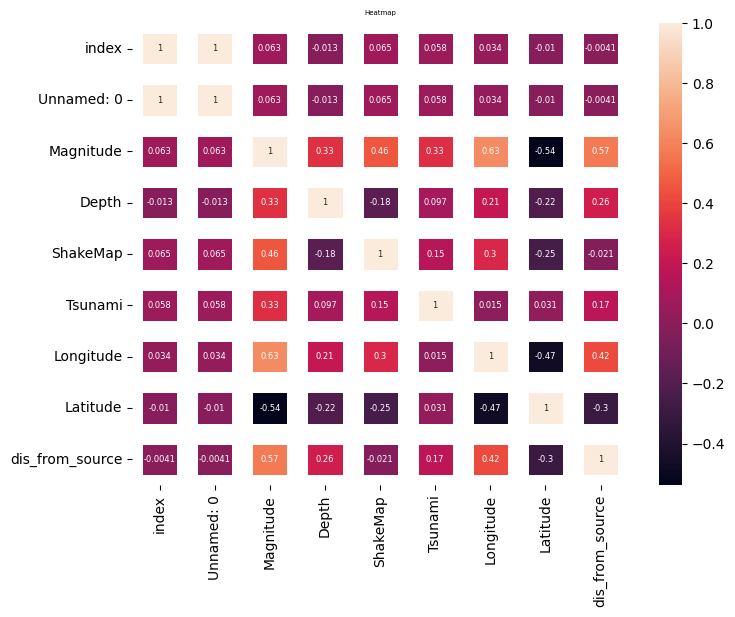

In [47]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.title('Heatmap', fontsize = 5)
ax.set_ylabel("Heatmap", fontsize = 6)

# add x-axis label and increase font size
ax.set_xlabel("Heatmap", fontsize = 6)
sns.heatmap(df3.corr(), annot = True, linewidths = 15, ax = ax,
            annot_kws = {"fontsize": 6})  # increase label size

#Campus IL

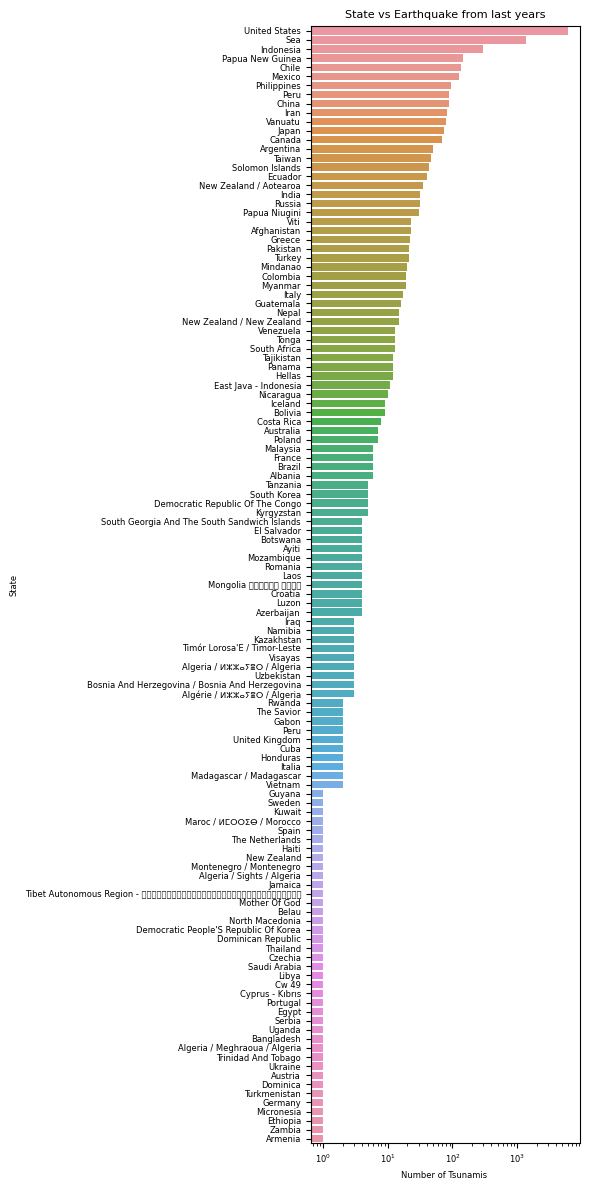

In [48]:
plt.figure(figsize = (6, 12))
countries = list(
    map(lambda x: x.title(), df3["State"].value_counts().keys().tolist()))
ax = sns.countplot(y = "State", data = df3,
                order = df3["State"].value_counts().index)

ax.set_xscale("log")
ax.axes.set_title("State vs Earthquake from last years", fontsize = 8)
ax.set_xlabel("Number of Tsunamis ", fontsize = 6)
ax.set_ylabel("State", fontsize = 6)
ax.tick_params(labelsize = 6)

ax.set_yticklabels(countries, rotation = 0, fontsize = 6)
plt.tight_layout()
plt.show()


# Source - https://seaborn.pydata.org/generated/seaborn.countplot.html

## Analyzing the correlation between "State" to "Tsunami"

In [49]:
ct1 = pd.crosstab(df3["State"], df3['Tsunami'])
chi2_contingency(ct1)

(367.2928711223977,
 2.1492191905417132e-26,
 122,
 array([[2.11664572e+01, 1.83354285e+00],
        [5.52168448e+00, 4.78315525e-01],
        [9.20280746e-01, 7.97192541e-02],
        [9.20280746e-01, 7.97192541e-02],
        [2.76084224e+00, 2.39157762e-01],
        [2.76084224e+00, 2.39157762e-01],
        [4.60140373e+01, 3.98596271e+00],
        [9.20280746e-01, 7.97192541e-02],
        [6.44196522e+00, 5.58034779e-01],
        [9.20280746e-01, 7.97192541e-02],
        [3.68112298e+00, 3.18877017e-01],
        [3.68112298e+00, 3.18877017e-01],
        [9.20280746e-01, 7.97192541e-02],
        [9.20280746e-01, 7.97192541e-02],
        [8.28252671e+00, 7.17473287e-01],
        [2.76084224e+00, 2.39157762e-01],
        [3.68112298e+00, 3.18877017e-01],
        [5.52168448e+00, 4.78315525e-01],
        [6.25790907e+01, 5.42090928e+00],
        [1.23317620e+02, 1.06823801e+01],
        [8.00644249e+01, 6.93557511e+00],
        [1.74853342e+01, 1.51466583e+00],
        [7.36224597e+00, 

## Creating new column after noticing great correlation between "State" to "Tsunami" - "Ratio_Tsunami_State"

In [78]:
df3["Tsunami"] = df3["Tsunami"].astype("int")
grouped = df3.groupby("State")

counts = {state: grouped.get_group(
    state)['Tsunami'].sum() for state in df3["State"].unique()}

amount = {state: grouped.get_group(
    state)["State"].count() for state in df3["State"].unique()}

ratio_tsunami_for_state = {state: counts[state]/amount[state] for state in df3["State"].unique()}


rank_list = [ratio_tsunami_for_state[state] for state in df3["State"]]
df3["Ratio_Tsunami_State"] = rank_list

In [79]:

df3["Tsunami"] = df3["Tsunami"].astype("category")
df3["IsSea"] = df3["IsSea"].astype("category")
df3["ShakeMap"] = df3["ShakeMap"].astype("category")
df3["DYFI"] = df3["DYFI"].astype("category")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 1728 to 11273
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                9546 non-null   int64         
 1   Unnamed: 0           9546 non-null   int64         
 2   Magnitude            9546 non-null   float64       
 3   Location             9546 non-null   object        
 4   Depth                9546 non-null   float64       
 5   DYFI                 9546 non-null   category      
 6   ShakeMap             9546 non-null   category      
 7   Tsunami              9546 non-null   category      
 8   Longitude            9546 non-null   float64       
 9   Latitude             9546 non-null   float64       
 10  Time                 9546 non-null   object        
 11  Date                 9546 non-null   datetime64[ns]
 12  RingOfFire           9546 non-null   category      
 13  IsSea                9546 non

# Outliers in the new columns 

,Unnamed: 0,Magnitude,Location,Depth,DYFI,ShakeMap,Tsunami,Longitude,Latitude,Time,Date,RingOfFire,IsSea,Source,dis_from_source,State,dis_from_source_discrete,Ratio_Tsunami_State,Ratio_Tsunami_State_discrete
31,31,5.7,Sea,74.2,4.0,5.0,0,-88.452,12.942,14:32:23,2022-12-15,1,1,"39 km SSE of Puerto El Triunfo, El Salvador",39.0,Sea,40-60,0.152926,0.16-0.18
32,32,5.9,"Hualien County, 97059, Taiwan",13.0,7.0,6.0,0,121.808,23.771,04:03:15,2022-12-15,0,0,"30 km SE of Hualien City, Taiwan",30.0,Taiwan,20-40,0.096774,0.1-0.12
34,34,5.0,"Let Saung Yu take a gift, Bridge U, Kyaukse Di...",10.0,6.0,6.0,0,95.902,21.864,20:46:31,2022-12-14,0,0,Myanmar,NaN,Myanmar,NaN,0.000000,NaN
36,36,5.5,Sea,10.0,2.0,3.0,0,-82.757,4.840,18:27:34,2022-12-12,1,1,south of Panama,NaN,Sea,NaN,0.152926,0.16-0.18
40,40,5.5,Sea,27.6,5.0,4.0,0,-72.084,-33.647,07:25:48,2022-10-12,1,1,"44 km W of San Antonio, Chile",44.0,Sea,40-60,0.152926,0.16-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11447,11447,5.0,Sea,8.1,5.0,3.0,0,-125.357,40.979,09:22:15,2003-08-15,1,1,"100 km WNW of Indianola, California",100.0,Sea,100-120,0.152926,0.16-0.18
11487,11487,5.2,Sea,17.2,5.0,5.0,0,-124.552,40.810,16:55:07,2002-06-17,1,1,"29 km WNW of Fields Landing, California",29.0,Sea,20-40,0.152926,0.16-0.18
11496,11496,4.6,Sea,6.8,5.0,3.0,0,-119.330,33.666,21:33:23,2002-03-16,0,1,"33km NW of Santa Barbara Is., CA",33.0,Sea,40-60,0.152926,0.16-0.18
11536,11536,5.4,Sea,2.2,4.0,3.0,0,-125.245,40.756,13:08:42,2001-01-13,1,1,off the coast of Northern California,NaN,Sea,NaN,0.152926,0.16-0.18


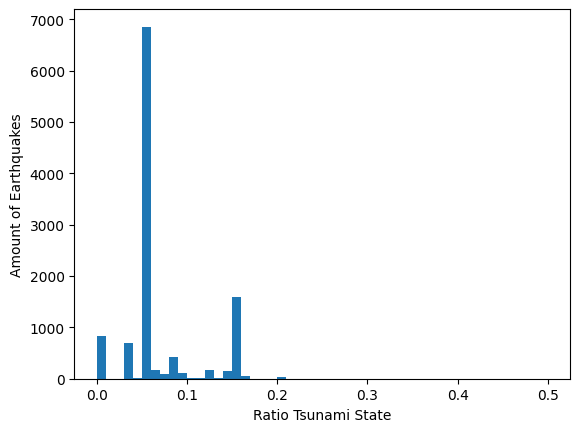

In [26]:
# Use seaborn to create a boxplot of the data

plt.hist(df3.Ratio_Tsunami_State, bins=50)
plt.xlabel("Ratio Tsunami State")
plt.ylabel("Amount of Earthquakes")
# Compute the 25th and 75th percentiles
q25 = df3["Ratio_Tsunami_State"].quantile(0.25)
q75 = df3["Ratio_Tsunami_State"].quantile(0.75)

# Calculate the IQR
iqr = q75 - q25

# Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
outliers = df3[(df3["Ratio_Tsunami_State"] < q25 - 3*iqr)
               | (df3["Ratio_Tsunami_State"] > q75 + 3*iqr)]

# Print the indices of the outliers
outliers

In [21]:
bins = [0,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21]
labels = ['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-0.1','0.1-0.12','0.12-0.14','0.14-0.16',"0.16-0.18","0.18-0.2",'>0.2']
df3['Ratio_Tsunami_State_discrete'] = pd.cut(df3['Ratio_Tsunami_State'], bins, labels=labels)


(247.56219977342676,
 9.149547258607137e-50,
 7,
 array([[6.78781508e+02, 5.32184922e+01],
        [6.50498945e+03, 5.10010551e+02],
        [4.72921542e+02, 3.70784577e+01],
        [1.15912143e+02, 9.08785728e+00],
        [1.78968348e+02, 1.40316516e+01],
        [1.51149434e+02, 1.18505659e+01],
        [1.52911299e+03, 1.19887013e+02],
        [3.61645885e+01, 2.83541147e+00]]))

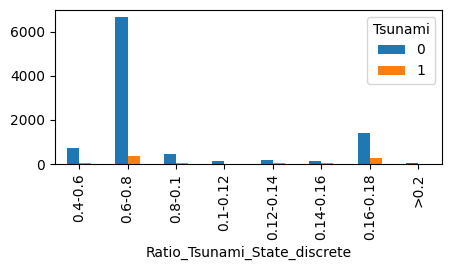

In [25]:
ct1 = pd.crosstab(df3["Ratio_Tsunami_State_discrete"], df3['Tsunami'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)

(464.3026733505944,
 3.182306674990775e-95,
 8,
 array([[ 731.62319296,   63.37680704],
        [1209.24890006,  104.75109994],
        [2233.52137021,  193.47862979],
        [2275.85428452,  197.14571548],
        [1253.42237586,  108.57762414],
        [ 548.48732453,   47.51267547],
        [ 268.72197779,   23.27802221],
        [ 182.21558768,   15.78441232],
        [  81.90498638,    7.09501362]]))

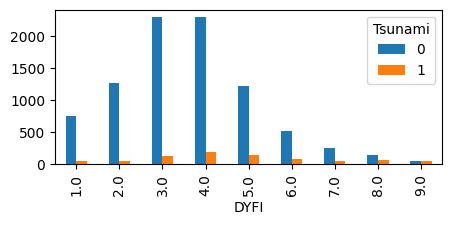

In [261]:
ct1 = pd.crosstab(df3['DYFI'], df3['Tsunami'])
ct1.plot(kind = 'bar',figsize = (5,2))
ct1
chi2_contingency(ct1)

(267.4639423895885,
 3.3984095825543683e-53,
 8,
 array([[7.38624807e+01, 6.13751935e+00],
        [5.07804554e+02, 4.21954455e+01],
        [1.74684767e+03, 1.45152333e+02],
        [3.38105505e+03, 2.80944948e+02],
        [1.36737917e+03, 1.13620827e+02],
        [8.24489940e+02, 6.85100597e+01],
        [3.73928808e+02, 3.10711917e+01],
        [6.55529516e+01, 5.44704842e+00],
        [1.10793721e+01, 9.20627902e-01]]))

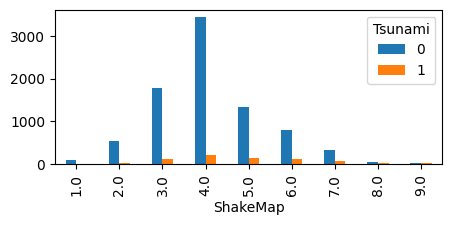

In [153]:
ct1 = pd.crosstab(df3['ShakeMap'], df3['Tsunami'])
ct1.plot(kind = 'bar',figsize = (5,2))
ct1
chi2_contingency(ct1)

(108.26914278853367,
 2.346494203859814e-25,
 1,
 array([[2897.04378797,  250.95621203],
        [5887.95621203,  510.04378797]]))

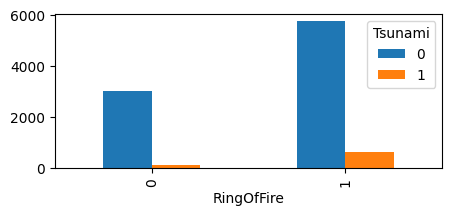

In [214]:
ct1 = pd.crosstab(df3['RingOfFire'], df3['Tsunami'])
ct1.plot(kind = 'bar',figsize = (5,2))
ct1
chi2_contingency(ct1)

(200.48981235525645,
 1.6328433302440943e-45,
 1,
 array([[7509.49088624,  650.50911376],
        [1275.50911376,  110.49088624]]))

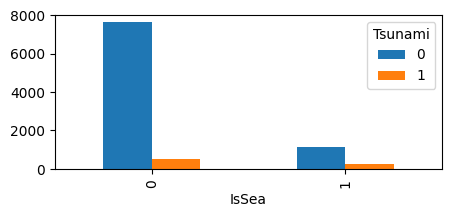

In [262]:
ct1 = pd.crosstab(df3['IsSea'], df3['Tsunami'])
ct1.plot(kind='bar',figsize=(5,2))

chi2_contingency(ct1)

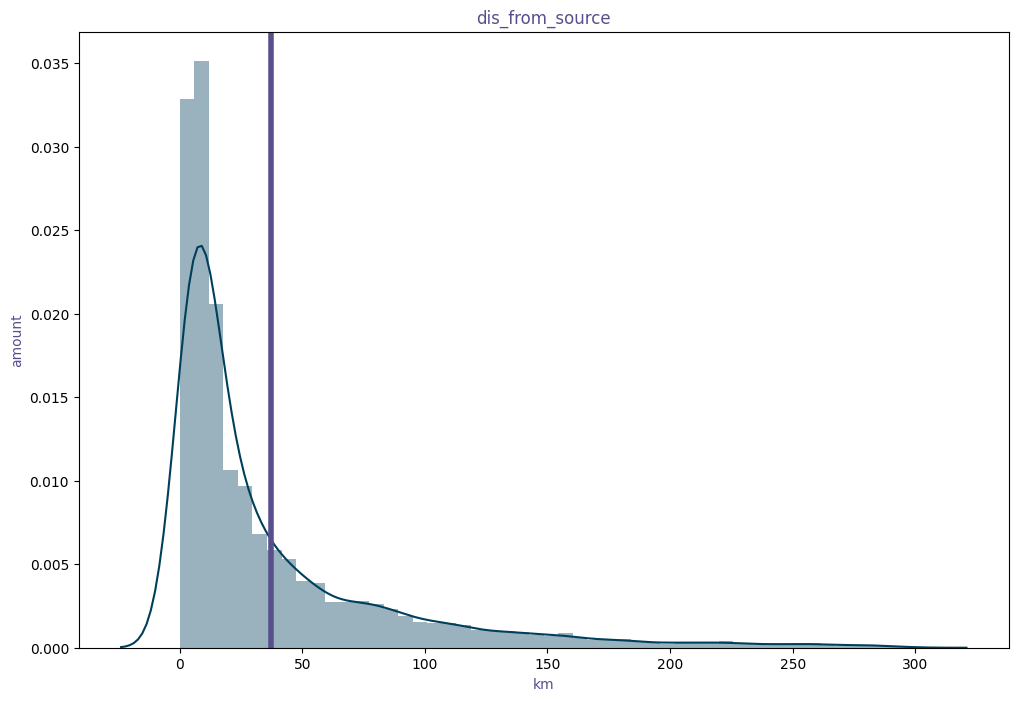

In [263]:
plt.figure(figsize=(12,8))
distance = df3["dis_from_source"].values
mean_D = df3["dis_from_source"].mean()

distance_plot = sns.distplot(distance, color = "#003f5c")
distance_plot.set_title("Distance from source", color = "#58508d")
distance_plot.set_ylabel("Percentage", color = "#58508d")
distance_plot.set_xlabel("KM", color = "#58508d")

plt.axvline(mean_D,0,1, color = "#58508d",linewidth = 4,label = "Mean")


# Source - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html

In [15]:
bins = [0,10,30,50,70,90,110,130,150,200]
labels = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','>160']
df3['dis_from_source_discrete'] = pd.cut(df3['dis_from_source'], bins, labels=labels)


(264.33168202008585,
 1.5711065699315177e-52,
 8,
 array([[3738.50908222,  246.49091778],
        [2779.72456979,  183.27543021],
        [1140.78470363,   75.21529637],
        [ 662.33059273,   43.66940727],
        [ 518.79435946,   34.20564054],
        [ 336.79416826,   22.20583174],
        [ 230.78374761,   15.21625239],
        [ 171.68059273,   11.31940727],
        [ 233.59818356,   15.40181644]]))

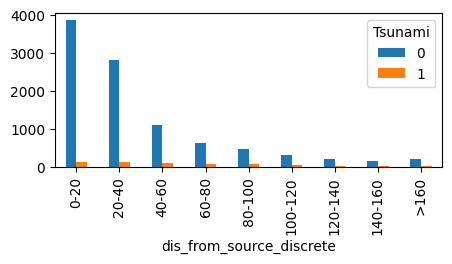

In [16]:
ct1 = pd.crosstab(df3['dis_from_source_discrete'], df3['Tsunami'])
ct1.plot(kind = 'bar', figsize = (5, 2))
chi2_contingency(ct1)

# Machine Learning

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [82]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 1728 to 11273
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                9546 non-null   int64         
 1   Unnamed: 0           9546 non-null   int64         
 2   Magnitude            9546 non-null   float64       
 3   Location             9546 non-null   object        
 4   Depth                9546 non-null   float64       
 5   DYFI                 9546 non-null   category      
 6   ShakeMap             9546 non-null   category      
 7   Tsunami              9546 non-null   category      
 8   Longitude            9546 non-null   float64       
 9   Latitude             9546 non-null   float64       
 10  Time                 9546 non-null   object        
 11  Date                 9546 non-null   datetime64[ns]
 12  RingOfFire           9546 non-null   category      
 13  IsSea                9546 non

## Selecting the features for the model

In [127]:
#the first machine learning
features = df3[["Longitude", "Latitude","Depth", 'Magnitude']]


In [83]:

# the second machine learning
df4 = df3.dropna(subset=["dis_from_source"], axis=0)
features2 = df4[["Longitude", "Latitude", "Depth", 'Magnitude', "Ratio_Tsunami_State", "dis_from_source"]]


In [128]:
#the first machine learning
X = features
y = df3['Tsunami']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()

Initial amount of samples: #9546
Number of training samples: #7636
Number of test samples: #1910
X_train:
y_train:


11233    1
9995     0
9470     0
9236     0
1809     0
Name: Tsunami, dtype: category
Categories (2, int64): [0, 1]

In [85]:
# the second machine learning
X = features2
y = df4['Tsunami']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()


Initial amount of samples: #9046
Number of training samples: #7236
Number of test samples: #1810
X_train:
y_train:


10260    0
8279     0
4984     0
11135    0
9217     0
Name: Tsunami, dtype: category
Categories (2, int64): [0, 1]

In [129]:
# Select numeric features:
X_train_numeric = X_train._get_numeric_data().copy()

X_numeric_cols = X_train_numeric.columns
X_test_numeric = X_test[X_numeric_cols].copy()

In [130]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_numeric_cols, index = X_train.index)
X_test_scaled  = pd.DataFrame(scaler.fit_transform(X_test_numeric), columns = X_numeric_cols, index = X_test.index)
X_train_scaled.head()

,Longitude,Latitude
11233,0.004500,0.294713
9995,0.528777,0.429868
9470,0.151813,0.727726
9236,0.177918,0.675362
1809,0.836697,0.605258


In [117]:
X_train_numeric.max().sort_values()

Magnitude      8.300
Latitude      79.680
Longitude    179.998
Depth        670.800
dtype: float64

In [131]:
#the first machine learning
X_discrete = df3[["DYFI","ShakeMap","RingOfFire","IsSea"]]

In [106]:
#the second machine learning
X_discrete2 = df4[["DYFI","ShakeMap","RingOfFire"]]

In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 1728 to 11273
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                9546 non-null   int64         
 1   Unnamed: 0           9546 non-null   int64         
 2   Magnitude            9546 non-null   float64       
 3   Location             9546 non-null   object        
 4   Depth                9546 non-null   float64       
 5   DYFI                 9546 non-null   category      
 6   ShakeMap             9546 non-null   category      
 7   Tsunami              9546 non-null   category      
 8   Longitude            9546 non-null   float64       
 9   Latitude             9546 non-null   float64       
 10  Time                 9546 non-null   object        
 11  Date                 9546 non-null   datetime64[ns]
 12  RingOfFire           9546 non-null   category      
 13  IsSea                9546 non

In [132]:
#the first model
X_discrete
X_discrete_encoded = pd.get_dummies(X_discrete, prefix_sep="__")

X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index, :]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index, :]
X_train_discrete_encoded

,DYFI__1.0,DYFI__2.0,DYFI__3.0,DYFI__4.0,DYFI__5.0,DYFI__6.0,DYFI__7.0,DYFI__8.0,DYFI__9.0,ShakeMap__1.0,...,ShakeMap__4.0,ShakeMap__5.0,ShakeMap__6.0,ShakeMap__7.0,ShakeMap__8.0,ShakeMap__9.0,RingOfFire__0,RingOfFire__1,IsSea__0,IsSea__1
11233,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9470,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9236,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1809,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6919,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
7118,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2588,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [100]:
#the second model
X_discrete2
X_discrete_encoded = pd.get_dummies(X_discrete2, prefix_sep="__")

X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index, :]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index, :]
X_train_discrete_encoded


,DYFI__1.0,DYFI__2.0,DYFI__3.0,DYFI__4.0,DYFI__5.0,DYFI__6.0,DYFI__7.0,DYFI__8.0,DYFI__9.0,ShakeMap__1.0,ShakeMap__2.0,ShakeMap__3.0,ShakeMap__4.0,ShakeMap__5.0,ShakeMap__6.0,ShakeMap__7.0,ShakeMap__8.0,ShakeMap__9.0,RingOfFire__0,RingOfFire__1
10260,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8279,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4984,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
11135,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9217,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7183,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7384,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2619,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11274 entries, 0 to 11585
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    11274 non-null  int64         
 1   Magnitude                     11274 non-null  float64       
 2   Location                      11274 non-null  object        
 3   Depth                         11274 non-null  float64       
 4   DYFI                          11274 non-null  category      
 5   ShakeMap                      11274 non-null  float64       
 6   Tsunami                       11274 non-null  int32         
 7   Longitude                     11274 non-null  float64       
 8   Latitude                      11274 non-null  float64       
 9   Time                          11274 non-null  object        
 10  Date                          11274 non-null  datetime64[ns]
 11  RingOfFire                  

In [133]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)



In [121]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
def describe_output_for_model(model, X_test, y_test):
        
        print("Predicting...")
        print("\tdisplaying information") 
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train_processed)
        print("Model train Accuracy: ", model.score(X_train_processed, y_train))
        print("Model test Accuracy: ", model.score(X_test, y_test))
        conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        
        print(conf_mat)
        print(f"the precision is:{precision_score(y_true=y_test, y_pred=y_pred)}")
        print(f"the recall_score is:{ recall_score(y_true=y_test, y_pred=y_pred)}")
        print(f"the f1_score is:{f1_score(y_true=y_test, y_pred=y_pred)}")

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced')

In [134]:
model = LogisticRegression(class_weight={1: 0.85, 0: 0.15})
model.fit(X_train_processed, y_train)

LogisticRegression(class_weight={0: 0.15, 1: 0.85})

In [135]:
describe_output_for_model(model, X_test_processed, y_test)

Predicting...
	displaying information
Model train Accuracy:  0.8615767417496071
Model test Accuracy:  0.8539267015706806
[[1550  213]
 [  66   81]]
the precision is:0.2755102040816326
the recall_score is:0.5510204081632653
the f1_score is:0.36734693877551017


In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

clf = RandomForestClassifier()
params = {"max_depth": [2, 3, 4, 5, 6, 7],"min_samples_split": [5, 10, 15, 20, 25, 30]}
clfCV = GridSearchCV(clf, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")

best params are:{'max_depth': 7, 'min_samples_split': 10}
best score are:0.9456884298846886


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import numpy as np


# Create the model
model2 = RandomForestClassifier(max_depth=7, min_samples_split=10)
model2.fit(X_train_processed, y_train)
describe_output_for_model(model, X_test_processed, y_test)

Predicting...
	displaying information
Model train Accuracy:  0.8998065229408513
Model test Accuracy:  0.8707182320441988
[[1474  191]
 [  43  102]]
the precision is:0.34812286689419797
the recall_score is:0.7034482758620689
the f1_score is:0.4657534246575343


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

clf=tree.DecisionTreeClassifier()
params={"max_depth":[2,3,4,5,6,7],"min_samples_split":[5,10,15,20,25,30]}
clfCV=GridSearchCV(clf,params,cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")

KeyboardInterrupt: 

In [125]:
model2 = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=30)

model2.fit(X_train_processed, y_train)
describe_output_for_model(model2,X_test_processed,y_test)

Predicting...
	displaying information
Model train Accuracy:  0.9510214772132006
Model test Accuracy:  0.9303664921465968
[[1685   78]
 [  55   92]]
the precision is:0.5411764705882353
the recall_score is:0.6258503401360545
the f1_score is:0.5804416403785488


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
params = {"max_iter":[100, 150, 200, 250 ,300, 350,400],
          "hidden_layer_sizes": [100, 150, 200, 250 ,300, 350, 400], "solver": ['lbfgs', 'sgd', 'adam'], "activation":['relu', 'tanh', 'logistic']}
clfCV = GridSearchCV(clf, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")


# Source - https://stackoverflow.com/questions/1514573/neural-network-example-source-code-preferably-python


In [136]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=370, hidden_layer_sizes=400,
                    activation="relu").fit(X_train_processed, y_train)
describe_output_for_model(clf, X_test_processed, y_test)

Predicting...
	displaying information
Model train Accuracy:  0.9328182294394971
Model test Accuracy:  0.9356020942408377
[[1732   31]
 [  92   55]]
the precision is:0.6395348837209303
the recall_score is:0.3741496598639456
the f1_score is:0.47210300429184554
